### Data Preparation and Feature Creation

In [427]:
import pandas as pd
import numpy as np

In [428]:
titanic = pd.read_csv("./Course_Materials_Part2/Course_Materials_Part2/Video_Lecture_NBs/titanic.csv")

In [429]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [430]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [431]:
titanic.age.fillna(titanic.age.mean(), inplace=True)

In [432]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.000000,1,0,7.2500,S,NaN
1,1,1,female,38.000000,1,0,71.2833,C,C
2,1,3,female,26.000000,0,0,7.9250,S,NaN
3,1,1,female,35.000000,1,0,53.1000,S,C
4,0,3,male,35.000000,0,0,8.0500,S,NaN
5,0,3,male,29.699118,0,0,8.4583,Q,NaN
6,0,1,male,54.000000,0,0,51.8625,S,E
7,0,3,male,2.000000,3,1,21.0750,S,NaN
8,1,3,female,27.000000,0,2,11.1333,S,NaN
9,1,2,female,14.000000,1,0,30.0708,C,NaN


#### Add/Sub/Mul/Div of Columns

얼마나 많은 가족이 함께 탑승했을까?

In [433]:
titanic.sibsp + titanic.parch

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

In [434]:
titanic.sibsp.add(titanic.parch)

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

In [435]:
titanic["no_relat"] = titanic.sibsp.add(titanic.parch)

In [436]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat
0,0,3,male,22.0,1,0,7.2500,S,NaN,1
1,1,1,female,38.0,1,0,71.2833,C,C,1
2,1,3,female,26.0,0,0,7.9250,S,NaN,0
3,1,1,female,35.0,1,0,53.1000,S,C,1
4,0,3,male,35.0,0,0,8.0500,S,NaN,0


In [437]:
sales = pd.read_csv("./Course_Materials_Part2/Course_Materials_Part2/Video_Lecture_NBs/sales.csv", index_col=0)

In [438]:
sales 

,Mon,Tue,Wed,Thu,Fri
Steven,34,27,15,NaN,33
Mike,45,9,74,87.0,12
Andi,17,33,54,8.0,29
Paul,87,67,27,45.0,7


In [439]:
sales.Mon + sales.Thu

Steven      NaN
Mike      132.0
Andi       25.0
Paul      132.0
dtype: float64

결측값을 더하면 결과도 결측값이 결과로 나온다. add를 사용하면 결측값을 채울 수 있다. 한문장으로 해결 가능!

In [440]:
sales.Mon.add(sales.Thu, fill_value=0)

Steven     34.0
Mike      132.0
Andi       25.0
Paul      132.0
dtype: float64

In [441]:
sales["perc_Bonus"] = [0.12,0.15,0.10,0.20]

In [442]:
sales

,Mon,Tue,Wed,Thu,Fri,perc_Bonus
Steven,34,27,15,NaN,33,0.12
Mike,45,9,74,87.0,12,0.15
Andi,17,33,54,8.0,29,0.10
Paul,87,67,27,45.0,7,0.20


In [443]:
sales.Thu * sales.perc_Bonus

Steven      NaN
Mike      13.05
Andi       0.80
Paul       9.00
dtype: float64

In [444]:
sales.Thu.mul(sales.perc_Bonus, fill_value = 0)

Steven     0.00
Mike      13.05
Andi       0.80
Paul       9.00
dtype: float64

In [445]:
sales.iloc[:, :-2].sum(axis = 1).mul(sales.perc_Bonus)

Steven     9.12
Mike      32.25
Andi      11.20
Paul      45.20
dtype: float64

In [446]:
sales["Bonus"] = sales.iloc[:, :-2].sum(axis = 1).mul(sales.perc_Bonus)

In [447]:
sales

,Mon,Tue,Wed,Thu,Fri,perc_Bonus,Bonus
Steven,34,27,15,NaN,33,0.12,9.12
Mike,45,9,74,87.0,12,0.15,32.25
Andi,17,33,54,8.0,29,0.10,11.20
Paul,87,67,27,45.0,7,0.20,45.20


#### Add/Sub/Mul with Scaler Value

In [448]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat
0,0,3,male,22.0,1,0,7.2500,S,NaN,1
1,1,1,female,38.0,1,0,71.2833,C,C,1
2,1,3,female,26.0,0,0,7.9250,S,NaN,0
3,1,1,female,35.0,1,0,53.1000,S,C,1
4,0,3,male,35.0,0,0,8.0500,S,NaN,0


In [449]:
1912 - titanic.age

0      1890.000000
1      1874.000000
2      1886.000000
3      1877.000000
4      1877.000000
          ...     
886    1885.000000
887    1893.000000
888    1882.300882
889    1886.000000
890    1880.000000
Name: age, Length: 891, dtype: float64

In [450]:
titanic["YoB"] = titanic.age.sub(1912, fill_value=None).mul(-1) # 음수를 양수로 바꾸기 위해 -1

In [451]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat,YoB
0,0,3,male,22.0,1,0,7.2500,S,NaN,1,1890.0
1,1,1,female,38.0,1,0,71.2833,C,C,1,1874.0
2,1,3,female,26.0,0,0,7.9250,S,NaN,0,1886.0
3,1,1,female,35.0,1,0,53.1000,S,C,1,1877.0
4,0,3,male,35.0,0,0,8.0500,S,NaN,0,1877.0


In [452]:
fx_rate = 1.1

In [453]:
titanic["EUR_fare"] = titanic.fare.div(fx_rate)

In [454]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat,YoB,EUR_fare
0,0,3,male,22.0,1,0,7.2500,S,NaN,1,1890.0,6.590909
1,1,1,female,38.0,1,0,71.2833,C,C,1,1874.0,64.803000
2,1,3,female,26.0,0,0,7.9250,S,NaN,0,1886.0,7.204545
3,1,1,female,35.0,1,0,53.1000,S,C,1,1877.0,48.272727
4,0,3,male,35.0,0,0,8.0500,S,NaN,0,1877.0,7.318182


In [455]:
titanic.drop(columns=["sibsp", "parch", "deck", "YoB", "EUR_fare"], inplace=True)

In [456]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,no_relat
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [457]:
sales

,Mon,Tue,Wed,Thu,Fri,perc_Bonus,Bonus
Steven,34,27,15,NaN,33,0.12,9.12
Mike,45,9,74,87.0,12,0.15,32.25
Andi,17,33,54,8.0,29,0.10,11.20
Paul,87,67,27,45.0,7,0.20,45.20


In [458]:
fixed_costs = 5

In [459]:
sales.iloc[:, :-2].sub(fixed_costs, fill_value = 0)

,Mon,Tue,Wed,Thu,Fri
Steven,29,22,10,-5.0,28
Mike,40,4,69,82.0,7
Andi,12,28,49,3.0,24
Paul,82,62,22,40.0,2


In [460]:
perc_Bonus = 0.1

In [461]:
sales.iloc[:, :-2].mul(perc_Bonus, fill_value = 0)

,Mon,Tue,Wed,Thu,Fri
Steven,3.4,2.7,1.5,0.0,3.3
Mike,4.5,0.9,7.4,8.7,1.2
Andi,1.7,3.3,5.4,0.8,2.9
Paul,8.7,6.7,2.7,4.5,0.7


In [462]:
sales.iloc[:, :-2]

,Mon,Tue,Wed,Thu,Fri
Steven,34,27,15,NaN,33
Mike,45,9,74,87.0,12
Andi,17,33,54,8.0,29
Paul,87,67,27,45.0,7


In [463]:
# 10달러씩 판매할 때마다 1.25달러의 보너스를 받을 수 있다고 설정
lot_size = 10
bonus_per_lot = 1.25

In [464]:
# 소수점이하는 버림
sales.iloc[:, :-2].floordiv(lot_size, fill_value = 0)

,Mon,Tue,Wed,Thu,Fri
Steven,3,2,1,0.0,3
Mike,4,0,7,8.0,1
Andi,1,3,5,0.0,2
Paul,8,6,2,4.0,0


In [465]:
sales.iloc[:, :-2].floordiv(lot_size, fill_value = 0).mul(bonus_per_lot).sum(axis=1)

Steven    11.25
Mike      25.00
Andi      13.75
Paul      25.00
dtype: float64

#### Transformation / Mapping

In [466]:
summer = pd.read_csv("./Course_Materials_Part2/Course_Materials_Part2/Video_Lecture_NBs/summer.csv")

In [467]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [468]:
sample = summer.sample(n = 7, random_state = 123).sort_values(by = "Year")

In [469]:
sample

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
4196,1924,Paris,Aquatics,Water polo,"AUSTIN, Arthur",USA,Men,Water Polo,Bronze
11961,1968,Mexico,Athletics,Athletics,"FOSBURY, Richard Douglas",USA,Men,High Jump,Gold
11742,1968,Mexico,Aquatics,Swimming,"WENDEN, Michael Vincent",AUS,Men,200M Freestyle,Gold
13996,1976,Montreal,Aquatics,Swimming,"MAC DONALD, Gary",CAN,Men,4X100M Medley Relay,Silver
16229,1980,Moscow,Rowing,Rowing,"DMITRIENKO, Grigori",URS,Men,Eight With Coxswain (8+),Bronze
19728,1992,Barcelona,Aquatics,Swimming,"KULIKOV, Vladislav",EUN,Men,4X100M Medley Relay,Silver
25901,2004,Athens,Boxing,Boxing,"YELEUOV, Serik",KAZ,Men,57 - 60KG (Lightweight),Bronze


In [470]:
city_country = {"Paris":"France", "Mexico":"Mexico", "Montreal":"Canada", "Moscow":"Russia", "Barcelona":"Spain", "Athens": "Greece"}

In [471]:
city_country

{'Paris': 'France',
 'Mexico': 'Mexico',
 'Montreal': 'Canada',
 'Moscow': 'Russia',
 'Barcelona': 'Spain',
 'Athens': 'Greece'}

In [472]:
sample.City.map(city_country)

4196     France
11961    Mexico
11742    Mexico
13996    Canada
16229    Russia
19728     Spain
25901    Greece
Name: City, dtype: object

In [473]:
sample["Host_Country"] = sample.City.map(city_country)

In [474]:
sample

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Host_Country
4196,1924,Paris,Aquatics,Water polo,"AUSTIN, Arthur",USA,Men,Water Polo,Bronze,France
11961,1968,Mexico,Athletics,Athletics,"FOSBURY, Richard Douglas",USA,Men,High Jump,Gold,Mexico
11742,1968,Mexico,Aquatics,Swimming,"WENDEN, Michael Vincent",AUS,Men,200M Freestyle,Gold,Mexico
13996,1976,Montreal,Aquatics,Swimming,"MAC DONALD, Gary",CAN,Men,4X100M Medley Relay,Silver,Canada
16229,1980,Moscow,Rowing,Rowing,"DMITRIENKO, Grigori",URS,Men,Eight With Coxswain (8+),Bronze,Russia
19728,1992,Barcelona,Aquatics,Swimming,"KULIKOV, Vladislav",EUN,Men,4X100M Medley Relay,Silver,Spain
25901,2004,Athens,Boxing,Boxing,"YELEUOV, Serik",KAZ,Men,57 - 60KG (Lightweight),Bronze,Greece


In [475]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,no_relat
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [476]:
mapper = {1:"First", 2:"Second", 3:"Third"}

In [477]:
titanic.pclass.map(mapper)

0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: pclass, Length: 891, dtype: object

In [478]:
titanic.pclass = titanic.pclass.map(mapper)

In [479]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,no_relat
0,0,Third,male,22.0,7.2500,S,1
1,1,First,female,38.0,71.2833,C,1
2,1,Third,female,26.0,7.9250,S,0
3,1,First,female,35.0,53.1000,S,1
4,0,Third,male,35.0,8.0500,S,0


#### Conditional Transformation

In [480]:
titanic.head(10)

,survived,pclass,sex,age,fare,embarked,no_relat
0,0,Third,male,22.000000,7.2500,S,1
1,1,First,female,38.000000,71.2833,C,1
2,1,Third,female,26.000000,7.9250,S,0
3,1,First,female,35.000000,53.1000,S,1
4,0,Third,male,35.000000,8.0500,S,0
5,0,Third,male,29.699118,8.4583,Q,0
6,0,First,male,54.000000,51.8625,S,0
7,0,Third,male,2.000000,21.0750,S,4
8,1,Third,female,27.000000,11.1333,S,2
9,1,Second,female,14.000000,30.0708,C,1


In [481]:
titanic.no_relat == 0

0      False
1      False
2       True
3      False
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: no_relat, Length: 891, dtype: bool

In [482]:
np.where(titanic.no_relat == 0, "Yes", "No")

array(['No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No',

In [483]:
titanic["alone"] = pd.Series(np.where(titanic.no_relat == 0, "Yes", "No"))

In [484]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,no_relat,alone
0,0,Third,male,22.0,7.2500,S,1,No
1,1,First,female,38.0,71.2833,C,1,No
2,1,Third,female,26.0,7.9250,S,0,Yes
3,1,First,female,35.0,53.1000,S,1,No
4,0,Third,male,35.0,8.0500,S,0,Yes


In [485]:
titanic["child"] = pd.Series(np.where(titanic.age < 18, "Yes", "No"))

In [486]:
titanic.head(10)

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child
0,0,Third,male,22.000000,7.2500,S,1,No,No
1,1,First,female,38.000000,71.2833,C,1,No,No
2,1,Third,female,26.000000,7.9250,S,0,Yes,No
3,1,First,female,35.000000,53.1000,S,1,No,No
4,0,Third,male,35.000000,8.0500,S,0,Yes,No
5,0,Third,male,29.699118,8.4583,Q,0,Yes,No
6,0,First,male,54.000000,51.8625,S,0,Yes,No
7,0,Third,male,2.000000,21.0750,S,4,No,Yes
8,1,Third,female,27.000000,11.1333,S,2,No,No
9,1,Second,female,14.000000,30.0708,C,1,No,Yes


#### Discretization and Binning with pd.cut() - 연속적인 데이터를 특정 구간으로 나누기

In [487]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child
0,0,Third,male,22.0,7.2500,S,1,No,No
1,1,First,female,38.0,71.2833,C,1,No,No
2,1,Third,female,26.0,7.9250,S,0,Yes,No
3,1,First,female,35.0,53.1000,S,1,No,No
4,0,Third,male,35.0,8.0500,S,0,Yes,No


In [488]:
age_bins = [0, 10, 18, 30, 55, 100]

In [489]:
pd.cut(titanic.age,age_bins, right=False) # 극우값 제외
# 0~9, 10~17, 18~29 ...

0      [18, 30)
1      [30, 55)
2      [18, 30)
3      [30, 55)
4      [30, 55)
         ...   
886    [18, 30)
887    [18, 30)
888    [18, 30)
889    [18, 30)
890    [30, 55)
Name: age, Length: 891, dtype: category
Categories (5, interval[int64, left]): [[0, 10) < [10, 18) < [18, 30) < [30, 55) < [55, 100)]

In [490]:
cats = pd.cut(titanic.age,age_bins, right=False)

In [491]:
cats.value_counts()

[18, 30)     448
[30, 55)     288
[0, 10)       62
[10, 18)      51
[55, 100)     42
Name: age, dtype: int64

In [492]:
titanic["age_cat"] = cats

In [493]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cat
0,0,Third,male,22.0,7.2500,S,1,No,No,"[18, 30)"
1,1,First,female,38.0,71.2833,C,1,No,No,"[30, 55)"
2,1,Third,female,26.0,7.9250,S,0,Yes,No,"[18, 30)"
3,1,First,female,35.0,53.1000,S,1,No,No,"[30, 55)"
4,0,Third,male,35.0,8.0500,S,0,Yes,No,"[30, 55)"


In [494]:
titanic.groupby("age_cat").survived.mean()

age_cat
[0, 10)      0.612903
[10, 18)     0.450980
[18, 30)     0.328125
[30, 55)     0.420139
[55, 100)    0.309524
Name: survived, dtype: float64

In [495]:
group_names = ["child", "teenager", "young_adult", "adult", "elderly"]

In [496]:
titanic["age_cat"] = pd.cut(titanic.age, age_bins, right=False, labels=group_names)

In [497]:
titanic.age_cat

0      young_adult
1            adult
2      young_adult
3            adult
4            adult
          ...     
886    young_adult
887    young_adult
888    young_adult
889    young_adult
890          adult
Name: age_cat, Length: 891, dtype: category
Categories (5, object): ['child' < 'teenager' < 'young_adult' < 'adult' < 'elderly']

####  Discretization and Binning with pd.qcut() - 구간을 정하기 어려운 경우

In [498]:
titanic.fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64

In [499]:
# 막대의 개수 정하기
pd.cut(titanic.fare, 5, precision=0)

0      (-1.0, 102.0]
1      (-1.0, 102.0]
2      (-1.0, 102.0]
3      (-1.0, 102.0]
4      (-1.0, 102.0]
           ...      
886    (-1.0, 102.0]
887    (-1.0, 102.0]
888    (-1.0, 102.0]
889    (-1.0, 102.0]
890    (-1.0, 102.0]
Name: fare, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(-1.0, 102.0] < (102.0, 205.0] < (205.0, 307.0] < (307.0, 410.0] < (410.0, 512.0]]

In [500]:
titanic["fare_cat"] = pd.cut(titanic.fare,5,precision=0)

In [501]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cat,fare_cat
0,0,Third,male,22.0,7.2500,S,1,No,No,young_adult,"(-1.0, 102.0]"
1,1,First,female,38.0,71.2833,C,1,No,No,adult,"(-1.0, 102.0]"
2,1,Third,female,26.0,7.9250,S,0,Yes,No,young_adult,"(-1.0, 102.0]"
3,1,First,female,35.0,53.1000,S,1,No,No,adult,"(-1.0, 102.0]"
4,0,Third,male,35.0,8.0500,S,0,Yes,No,adult,"(-1.0, 102.0]"


In [502]:
titanic.fare_cat.value_counts()

(-1.0, 102.0]     838
(102.0, 205.0]     33
(205.0, 307.0]     17
(410.0, 512.0]      3
(307.0, 410.0]      0
Name: fare_cat, dtype: int64

(307.0, 410.0] 사이에는 한 사람도 포함되지 않음 -> 5구간으로 나눌 필요가 없었음 -> qcut() 사용

In [503]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cat,fare_cat
0,0,Third,male,22.0,7.2500,S,1,No,No,young_adult,"(-1.0, 102.0]"
1,1,First,female,38.0,71.2833,C,1,No,No,adult,"(-1.0, 102.0]"
2,1,Third,female,26.0,7.9250,S,0,Yes,No,young_adult,"(-1.0, 102.0]"
3,1,First,female,35.0,53.1000,S,1,No,No,adult,"(-1.0, 102.0]"
4,0,Third,male,35.0,8.0500,S,0,Yes,No,adult,"(-1.0, 102.0]"


In [504]:
pd.qcut(titanic.fare,5) # 5개의 구간에 20%씩 배분

0        (-0.001, 7.854]
1      (39.688, 512.329]
2          (7.854, 10.5]
3      (39.688, 512.329]
4          (7.854, 10.5]
             ...        
886       (10.5, 21.679]
887     (21.679, 39.688]
888     (21.679, 39.688]
889     (21.679, 39.688]
890      (-0.001, 7.854]
Name: fare, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

In [505]:
titanic["fare_cat"] = pd.qcut(titanic.fare, 5) 

In [506]:
titanic.fare_cat.value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: fare_cat, dtype: int64

In [507]:
# 구간 간격 지정 가능, precision = 0으로 지정해서 소수점 한자리 수까지
pd.qcut(titanic.fare, [0, 0.1, 0.25, 0.5, 0.9, 1], precision = 0) 

0       (-0.1, 7.6]
1      (14.5, 78.0]
2       (7.9, 14.5]
3      (14.5, 78.0]
4       (7.9, 14.5]
           ...     
886     (7.9, 14.5]
887    (14.5, 78.0]
888    (14.5, 78.0]
889    (14.5, 78.0]
890      (7.6, 7.9]
Name: fare, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(-0.1, 7.6] < (7.6, 7.9] < (7.9, 14.5] < (14.5, 78.0] < (78.0, 512.3]]

In [508]:
titanic["fare_cat"] = pd.qcut(titanic.fare, [0, 0.1, 0.25, 0.5, 0.9, 1], precision = 0) 

In [509]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cat,fare_cat
0,0,Third,male,22.0,7.2500,S,1,No,No,young_adult,"(-0.1, 7.6]"
1,1,First,female,38.0,71.2833,C,1,No,No,adult,"(14.5, 78.0]"
2,1,Third,female,26.0,7.9250,S,0,Yes,No,young_adult,"(7.9, 14.5]"
3,1,First,female,35.0,53.1000,S,1,No,No,adult,"(14.5, 78.0]"
4,0,Third,male,35.0,8.0500,S,0,Yes,No,adult,"(7.9, 14.5]"


In [510]:
titanic.fare_cat.value_counts()

(14.5, 78.0]     357
(7.9, 14.5]      224
(7.6, 7.9]       131
(-0.1, 7.6]       92
(78.0, 512.3]     87
Name: fare_cat, dtype: int64

In [511]:
fare_labels =["very_cheap", "cheap", "moderate", "exp", "very_exp"]

In [512]:
titanic["fare_cat"] =  pd.qcut(titanic.fare, [0, 0.1, 0.25, 0.5, 0.9, 1], precision = 0, labels = fare_labels) 

In [513]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cat,fare_cat
0,0,Third,male,22.0,7.2500,S,1,No,No,young_adult,very_cheap
1,1,First,female,38.0,71.2833,C,1,No,No,adult,exp
2,1,Third,female,26.0,7.9250,S,0,Yes,No,young_adult,moderate
3,1,First,female,35.0,53.1000,S,1,No,No,adult,exp
4,0,Third,male,35.0,8.0500,S,0,Yes,No,adult,moderate


In [514]:
titanic.fare_cat.value_counts()

exp           357
moderate      224
cheap         131
very_cheap     92
very_exp       87
Name: fare_cat, dtype: int64

In [515]:
titanic.groupby(["age_cat", "fare_cat"]).survived.mean().unstack()

fare_cat,very_cheap,cheap,moderate,exp,very_exp
age_cat,,,,,
child,NaN,NaN,0.875000,0.568627,0.666667
teenager,0.333333,0.500000,0.500000,0.263158,1.000000
young_adult,0.180328,0.269231,0.228070,0.450000,0.655172
adult,0.000000,0.050000,0.320513,0.488000,0.809524
elderly,0.000000,0.000000,0.250000,0.272727,0.714286


나이가 든 승객일수록, 싼 티켓을 구입한 승객일수록 생존율이 낮음
=> 어린이나 청년 승객이 많이 살아남았고 비싼 티켓을 구입한 부유한 승객들이 많이 살아남았다.

#### Caps and Floors(상한값과 하한값) -아웃라이어 제거
머신러닝에서 아웃라이어로 인해 결과가 왜곡되는 등 부정적인 영향을 받는다. 아웃라이어가 있는 전체 행을 제거해도 되지만 그렇게 하면 다른 열에 영향을 미치는 데이터가 모두 삭제되어 버린다.

In [516]:
import matplotlib.pyplot as plt

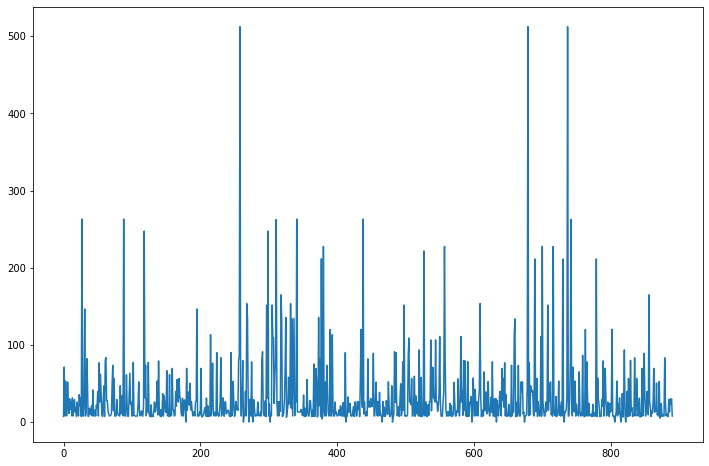

In [517]:
titanic.fare.plot(figsize = (12, 8))
plt.show()

In [518]:
titanic.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [519]:
titanic.fare.sort_values(ascending=False)
# 512달러, 263달러, 247달러를 낸 승객들 모두 부자

258    512.3292
737    512.3292
679    512.3292
88     263.0000
27     263.0000
         ...   
633      0.0000
413      0.0000
822      0.0000
732      0.0000
674      0.0000
Name: fare, Length: 891, dtype: float64

In [520]:
# 상한값 지정, 250달러 이상의 티켓을 산 승객은 모두 부자
fare_cap = 250

In [521]:
# 250보다 높은 값을 선택해서 새 값으로 대체(250)
titanic.loc[titanic.fare > fare_cap, "fare"] = fare_cap

In [522]:
fare_floor = 5

In [523]:
# 5달러보다 낮은 값들은 모두 5로 대체
titanic.loc[titanic.fare < fare_floor, "fare"] = fare_floor

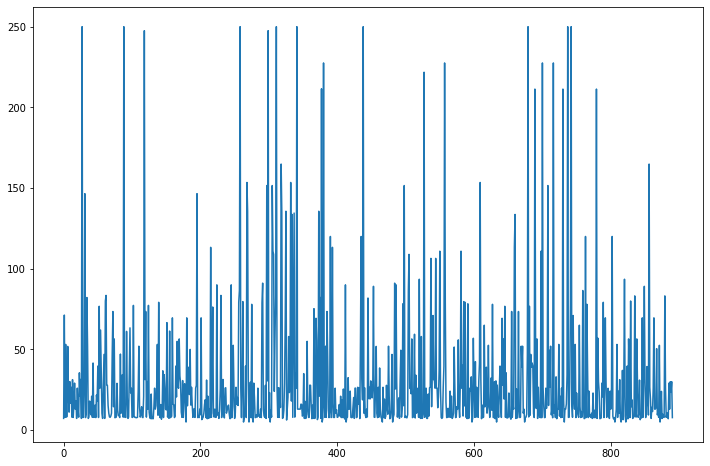

In [524]:
titanic.fare.plot(figsize = (12, 8))
plt.show()

In [525]:
titanic.fare.describe()# 표준편차가 많이 낮아짐

count    891.000000
mean      31.320089
std       42.517981
min        5.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      250.000000
Name: fare, dtype: float64

이렇게 함으로써 추후에 이루어질 통계와 머신 러닝 분석의 결과에 대한 신뢰도를 높일 수 있다.

#### Scaling / Standardization
머신러닝과 통계 분석에 사용되는 알고리즘들은 스케일에 매우 민감하다.  데이터셋을 같은 스케일로 바꿔줘야 한다.

In [526]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cat,fare_cat
0,0,Third,male,22.0,7.2500,S,1,No,No,young_adult,very_cheap
1,1,First,female,38.0,71.2833,C,1,No,No,adult,exp
2,1,Third,female,26.0,7.9250,S,0,Yes,No,young_adult,moderate
3,1,First,female,35.0,53.1000,S,1,No,No,adult,exp
4,0,Third,male,35.0,8.0500,S,0,Yes,No,adult,moderate


In [527]:
titanic.describe()
# 나이와 운송 요금의 평균은 비슷하지만 표준 편차 차이가 있다.

,survived,age,fare,no_relat
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,31.320089,0.904602
std,0.486592,13.002015,42.517981,1.613459
min,0.000000,0.420000,5.000000,0.000000
25%,0.000000,22.000000,7.910400,0.000000
50%,0.000000,29.699118,14.454200,0.000000
75%,1.000000,35.000000,31.000000,1.000000
max,1.000000,80.000000,250.000000,10.000000


In [528]:
import matplotlib.pyplot as plt

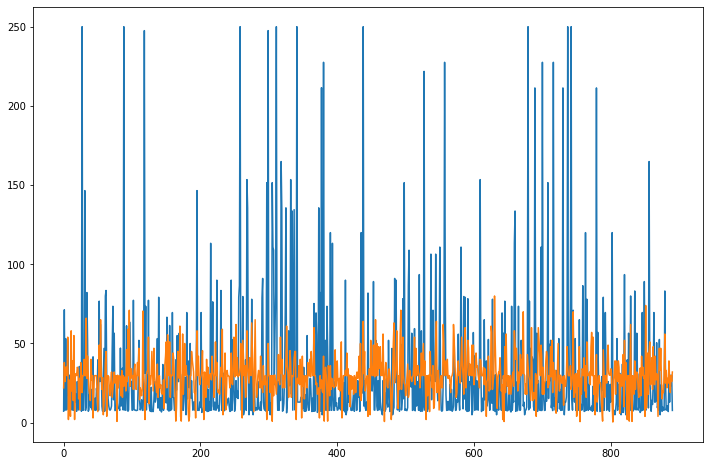

In [529]:
titanic.fare.plot(figsize = (12,8))
titanic.age.plot(figsize = (12,8))
plt.show()
# 두 열의 평균값이 거의 비슷하게 보였지만, 실제로 이 두 열의 스케일은 꽤 큰 차이가 있다.

In [530]:
mean_age = titanic.age.mean()
mean_fare = titanic.fare.mean()

In [531]:
std_age = titanic.age.std()
std_fare = titanic.fare.std()

In [532]:
# 각 값에서 평균값을 빼고 그 결과를 표준 편차로 나눈다.
titanic["age_z"] = round((titanic.age-mean_age) / std_age,2)
titanic["fare_z"] = round((titanic.fare- mean_fare) / std_fare,2)
# 값이 0이면 표준 편차가 0이라는 뜻이고 그 말은 이 승객의 실제 나이가 평균 나이와 같다는 말

In [533]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,no_relat,alone,child,age_cat,fare_cat,age_z,fare_z
0,0,Third,male,22.0,7.2500,S,1,No,No,young_adult,very_cheap,-0.59,-0.57
1,1,First,female,38.0,71.2833,C,1,No,No,adult,exp,0.64,0.94
2,1,Third,female,26.0,7.9250,S,0,Yes,No,young_adult,moderate,-0.28,-0.55
3,1,First,female,35.0,53.1000,S,1,No,No,adult,exp,0.41,0.51
4,0,Third,male,35.0,8.0500,S,0,Yes,No,adult,moderate,0.41,-0.55


In [534]:
round(titanic.describe(),2)

,survived,age,fare,no_relat,age_z,fare_z
count,891.00,891.00,891.00,891.00,891.00,891.00
mean,0.38,29.70,31.32,0.90,0.00,0.00
std,0.49,13.00,42.52,1.61,1.00,1.00
min,0.00,0.42,5.00,0.00,-2.25,-0.62
25%,0.00,22.00,7.91,0.00,-0.59,-0.55
50%,0.00,29.70,14.45,0.00,0.00,-0.40
75%,1.00,35.00,31.00,1.00,0.41,-0.01
max,1.00,80.00,250.00,10.00,3.87,5.14


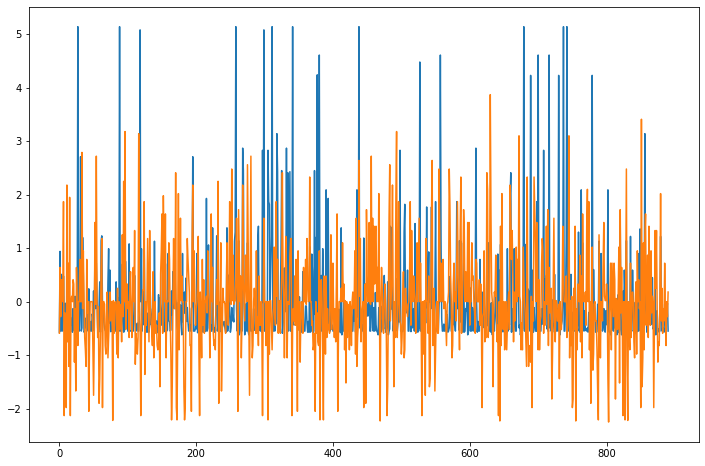

In [535]:
titanic.fare_z.plot(figsize = (12,8))
titanic.age_z.plot(figsize = (12,8))
plt.show()

#### Creating Dummy Variables(One-Hot Encoding)
머신러닝은 수치형 데이터로 변환된 형태만 처리할 수 있으로 범주형 변수를 변환된 형태로 처리해줘야 한다.

In [536]:
titanic.drop(labels = ["age", "alone", "child", "age_z", "fare_z", "fare_cat"], axis = 1, inplace = True)

In [537]:
titanic

,survived,pclass,sex,fare,embarked,no_relat,age_cat
0,0,Third,male,7.2500,S,1,young_adult
1,1,First,female,71.2833,C,1,adult
2,1,Third,female,7.9250,S,0,young_adult
3,1,First,female,53.1000,S,1,adult
4,0,Third,male,8.0500,S,0,adult
...,...,...,...,...,...,...,...
886,0,Second,male,13.0000,S,0,young_adult
887,1,First,female,30.0000,S,0,young_adult
888,0,Third,female,23.4500,S,3,young_adult
889,1,First,male,30.0000,C,0,young_adult


In [539]:
# 가변수로 변환하려는 열을 매개변수에 입력
pd.get_dummies(titanic, columns=["sex", "pclass"])
# 두 번 반복되는 정보는 왜곡된 결과를 도출 -> 하나의 열 삭제(k-1 변환)
# -> 0과 1로 이루어진 범주형 열로 변환된 데이터는 하나를 제거하더라도 원하는 정보를 얻을 수 있다. 

,survived,fare,embarked,no_relat,age_cat,sex_female,sex_male,pclass_First,pclass_Second,pclass_Third
0,0,7.2500,S,1,young_adult,0,1,0,0,1
1,1,71.2833,C,1,adult,1,0,1,0,0
2,1,7.9250,S,0,young_adult,1,0,0,0,1
3,1,53.1000,S,1,adult,1,0,1,0,0
4,0,8.0500,S,0,adult,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,13.0000,S,0,young_adult,0,1,0,1,0
887,1,30.0000,S,0,young_adult,1,0,1,0,0
888,0,23.4500,S,3,young_adult,1,0,0,0,1
889,1,30.0000,C,0,young_adult,0,1,1,0,0


In [541]:
titanic_d = pd.get_dummies(titanic, columns = ["sex", "pclass", "embarked", "age_cat"], drop_first=True)

In [542]:
titanic_d.head()

,survived,fare,no_relat,sex_male,pclass_Second,pclass_Third,embarked_Q,embarked_S,age_cat_teenager,age_cat_young_adult,age_cat_adult,age_cat_elderly
0,0,7.2500,1,1,0,1,0,1,0,1,0,0
1,1,71.2833,1,0,0,0,0,0,0,0,1,0
2,1,7.9250,0,0,0,1,0,1,0,1,0,0
3,1,53.1000,1,0,0,0,0,1,0,0,1,0
4,0,8.0500,0,1,0,1,0,1,0,0,1,0


In [543]:
# 행은 그대로, 열은 늘어남, 추가된 더미형 수는 정수형
titanic_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   survived             891 non-null    int64  
 1   fare                 891 non-null    float64
 2   no_relat             891 non-null    int64  
 3   sex_male             891 non-null    uint8  
 4   pclass_Second        891 non-null    uint8  
 5   pclass_Third         891 non-null    uint8  
 6   embarked_Q           891 non-null    uint8  
 7   embarked_S           891 non-null    uint8  
 8   age_cat_teenager     891 non-null    uint8  
 9   age_cat_young_adult  891 non-null    uint8  
 10  age_cat_adult        891 non-null    uint8  
 11  age_cat_elderly      891 non-null    uint8  
dtypes: float64(1), int64(2), uint8(9)
memory usage: 28.8 KB


#### String Operations

In [544]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [545]:
summer.Athleteh = summer.Athlete.str.title()

C:\Users\skygg\AppData\Local\Temp\ipykernel_2836\455228367.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  summer.Athleteh = summer.Athlete.str.title()


In [547]:
summer.Athlete.str.split(", ", n=1, expand=True)

,0,1
0,HAJOS,Alfred
1,HERSCHMANN,Otto
2,DRIVAS,Dimitrios
3,MALOKINIS,Ioannis
4,CHASAPIS,Spiridon
...,...,...
31160,JANIKOWSKI,Damian
31161,REZAEI,Ghasem Gholamreza
31162,TOTROV,Rustam
31163,ALEKSANYAN,Artur


In [549]:
summer[["Surname", "First_Name"]] = summer.Athlete.str.split(", ", n = 1, expand = True)

In [550]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Surname,First_Name
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,HAJOS,Alfred
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,HERSCHMANN,Otto
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,DRIVAS,Dimitrios
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,MALOKINIS,Ioannis
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,CHASAPIS,Spiridon


In [551]:
summer["Surname"] = summer.Surname.str.strip()

In [553]:
summer["First_Name"] = summer.First_Name.str.strip()

In [554]:
summer.drop(columns="Athlete")

,Year,City,Sport,Discipline,Country,Gender,Event,Medal,Surname,First_Name
0,1896,Athens,Aquatics,Swimming,HUN,Men,100M Freestyle,Gold,HAJOS,Alfred
1,1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver,HERSCHMANN,Otto
2,1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Bronze,DRIVAS,Dimitrios
3,1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Gold,MALOKINIS,Ioannis
4,1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Silver,CHASAPIS,Spiridon
...,...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,POL,Men,Wg 84 KG,Bronze,JANIKOWSKI,Damian
31161,2012,London,Wrestling,Wrestling Freestyle,IRI,Men,Wg 96 KG,Gold,REZAEI,Ghasem Gholamreza
31162,2012,London,Wrestling,Wrestling Freestyle,RUS,Men,Wg 96 KG,Silver,TOTROV,Rustam
31163,2012,London,Wrestling,Wrestling Freestyle,ARM,Men,Wg 96 KG,Bronze,ALEKSANYAN,Artur
